### Importing Relevant Libraries

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

### Importing Dataset's MetaData as a DataFrame

In [14]:
df = pd.read_csv("HAM10000_metadata.csv")

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


### Defining the Image Classes

In [15]:
cancer_type = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

cancer_id = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}




### Creating Separate column for Cancer Type and ID, based on above mappings

In [16]:
df['cancer_type']=df['dx'].map(cancer_type)
df['cancer_id'] = df['dx'].map(cancer_id)

In [17]:
len(df)

10015

In [18]:
df['cancer_type'].value_counts()

cancer_type
Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: count, dtype: int64

##### Note majority class; dataset will require some balancing technique

### Reading the first Image

In [19]:
fname_images = np.array(df['image_id'])
file ='HAM10000_images_part_1/'+str(fname_images[0])+'.jpg'

import cv2
from cv2 import imread, resize

img = imread(file)
img1 = resize(img,(100,100))

### Showing example Image

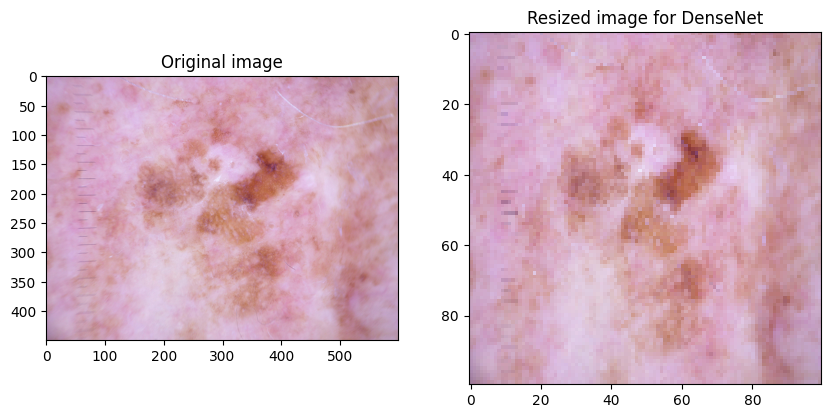

In [20]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(img1[:,:,::-1])
plt.title('Resized image for DenseNet')
plt.show()

### Avoinging overfitting of one class, generate rotated images of the original to increase dataset dimensionality

In [21]:
def generate_new_img(img):
    # produce new images by rotating of flipping the original one
    # this helps to increase the dimension of the dataset, avoiding overfitting of a single class
    imga = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
    imgb = cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE)
    imgc = cv2.rotate(img,cv2.ROTATE_180)
    imgd = cv2.flip(img,0)
    imge = cv2.flip(img,1)
    return imga,imgb,imgc,imgd,imge

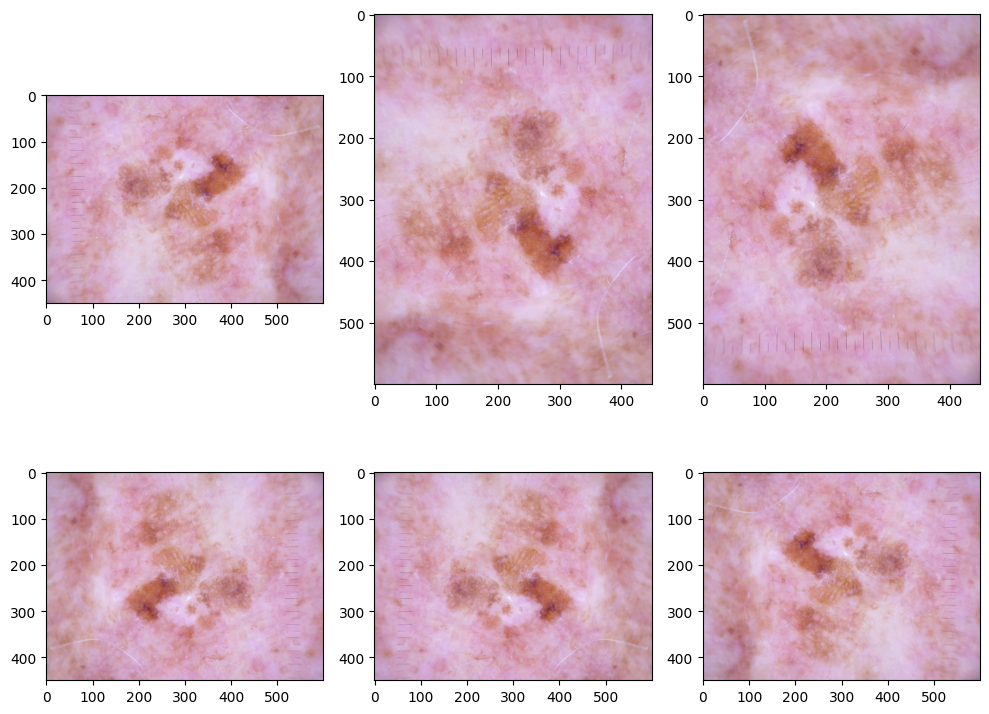

In [22]:
new_img = generate_new_img(img)

plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
plt.imshow(img[:,:,::-1])
for i in range(5):
    plt.subplot(2,3,2+i)
    plt.imshow(new_img[i][:,:,::-1])
plt.tight_layout()
plt.show()

### Importing Images from the 2 folders

In [23]:
# Defining Folder locations

X = []
y = []

lista1 = os.listdir("HAM10000_images_part_1/")
lista2 = os.listdir("HAM10000_images_part_2/")

### Importing images from part_1 folder

In [24]:
for i in range(len(lista1)):
    fname_image = lista1[i]
    fname_ID = fname_image.replace('.jpg','')
    
    #features 
    file_to_read ="HAM10000_images_part_1/"+str(fname_image)
    img = imread(file_to_read)
    img2 = resize(img,(100,100))
    X.append(img2)
    
    #targets
    output = np.array(df[df['image_id'] == fname_ID].cancer_id)
    y.append(output[0])
    
    # add more images for class between 1-6, rotating them 
    if output != 0:
        new_img = generate_new_img(img2)
        for i in range(5):
            X.append(new_img[i])
            y.append(output[0])
       
    if i % int(100) == 0:
        print(i,'images loaded')

0 images loaded


100 images loaded
200 images loaded
300 images loaded
400 images loaded
500 images loaded
600 images loaded
700 images loaded
800 images loaded
900 images loaded
1000 images loaded
1100 images loaded
1300 images loaded
1500 images loaded
1600 images loaded
1700 images loaded
1800 images loaded
2000 images loaded
2100 images loaded
2200 images loaded
2700 images loaded
2800 images loaded
2900 images loaded
3000 images loaded
3200 images loaded
3400 images loaded
3600 images loaded
3900 images loaded
4000 images loaded
4100 images loaded
4200 images loaded
4700 images loaded
4800 images loaded
4900 images loaded


### Importing images from part_1 folder

In [25]:
# import images from folder 2
for i in range(len(lista2)):
    fname_image = lista2[i]
    fname_ID = fname_image.replace('.jpg','')
    
    #features
    file_to_read ="HAM10000_images_part_2/"+str(fname_image)
    img = imread(file_to_read)
    img2 = resize(img,(100,100))
    X.append(img2)
    
    #targets
    output = np.array(df[df['image_id'] == fname_ID].cancer_id)
    y.append(output[0])
    
    # add more images for class between 1-6
    if output != 0:
        new_img = generate_new_img(img2)
        for i in range(5):
            X.append(new_img[i])
            y.append(output[0])
    
    if i % int(100) == 0:

        print(len(lista1)+i,'images loaded')

5100 images loaded
5300 images loaded
5400 images loaded
5600 images loaded
5800 images loaded
6100 images loaded
6200 images loaded
6400 images loaded
6500 images loaded
6600 images loaded
6700 images loaded
6800 images loaded
6900 images loaded
7100 images loaded
7200 images loaded
7300 images loaded
7500 images loaded
7600 images loaded
7700 images loaded
7800 images loaded
8100 images loaded
8200 images loaded
8300 images loaded
8400 images loaded
8700 images loaded
8800 images loaded
8900 images loaded
9400 images loaded
9500 images loaded
9600 images loaded
9700 images loaded
9800 images loaded
9900 images loaded
10000 images loaded


### Softmax activation function to be used requires dummy variables (of the target)

In [26]:
from tensorflow.keras.utils import to_categorical

X = np.array(X)
y = np.array(y)

y_train = to_categorical(y, num_classes=7)

### Splitting Dataset into Test and Train parts 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.33, random_state=50,stratify=y)


print('Train dataset shape',X_train.shape)
print('Test dataset shape',X_test.shape)

Train dataset shape (17798, 100, 100, 3)
Test dataset shape (8767, 100, 100, 3)


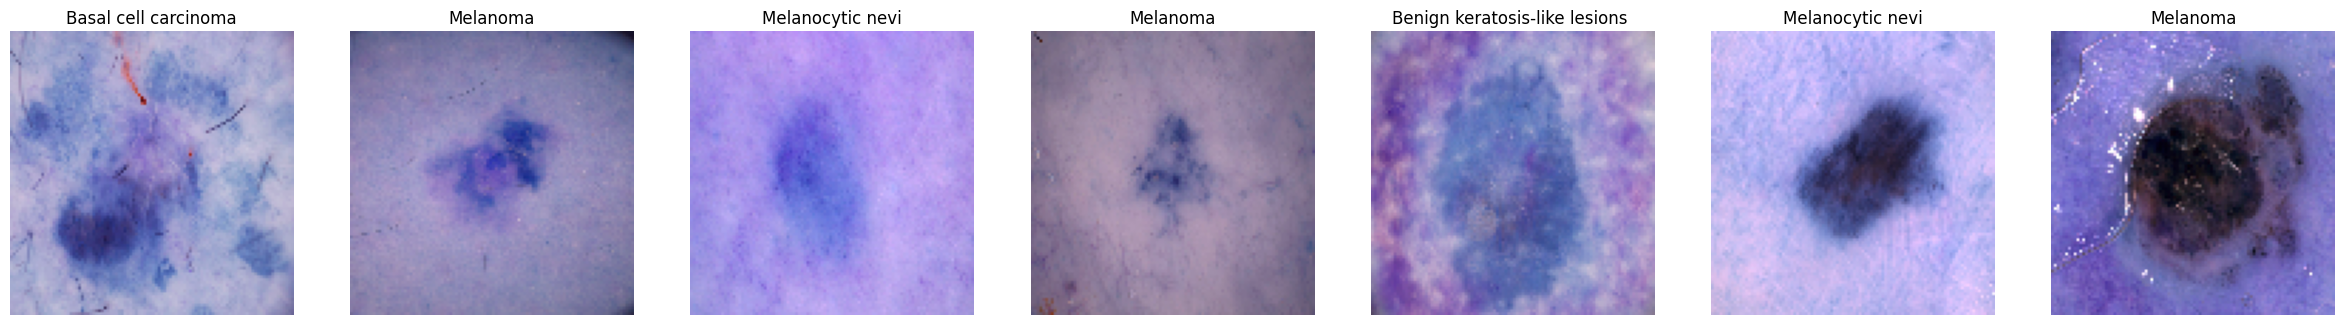

In [28]:
cancer_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']

fig, ax = plt.subplots(1, 7, figsize=(30, 30))
for i in range(7):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(cancer_names[np.argmax(y_train[i])])

### Problem is unbalanced, and class weights need to be provided

In [30]:
from sklearn.utils.class_weight import compute_class_weight
y_id = np.array(df['cancer_id'])

# compute weights for the loss function, because the problem is unbalanced
class_weights = np.around(compute_class_weight(class_weight='balanced',classes=np.unique(y_id),y=y),2)
class_weights = dict(zip(np.unique(y_id),class_weights))

print('The problem is unbalanced. These are the class_weights ')
print(class_weights)

The problem is unbalanced. These are the class_weights 
{0: 0.57, 1: 0.57, 2: 0.58, 3: 1.23, 4: 1.93, 5: 4.45, 6: 5.5}


In [31]:

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [32]:
def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x


def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters

def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters


def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(100, 100, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)

In [33]:
dense_block_size = 6
layers_in_block = 8

growth_rate = 36
classes = 7
model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 100, 100, 24)         648       ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 100, 100, 24)         0         ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 50, 50, 24)           0         ['activation[0][0]']          
 D)                                                                                           

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


# anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
# checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

# datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)


# datagen.fit(X_train)
# # Fits-the-model
# history = model.fit(datagen.flow(xtrain, ytrain, batch_size=128),
#                steps_per_epoch=xtrain.shape[0] //128,
#                epochs=50,
#                verbose=2,
#                callbacks=[anne, checkpoint],
#                validation_data=(xtrain, ytrain))

early_stopping_monitor = EarlyStopping(patience=100,monitor='val_accuracy')
model_checkpoint_callback = ModelCheckpoint(filepath='model.h5',
                                            save_weights_only=False,
                                            monitor='val_accuracy',
                                            mode='auto',
                                            save_best_only=True,
                                            verbose=1)

batch_size = 32
epochs = 100
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [35]:
datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)

# datagen = ImageDataGenerator(
#     featurewise_center=False,  # set input mean to 0 over the dataset
#     samplewise_center=False,  # set each sample mean to 0
#     featurewise_std_normalization=False,  # divide inputs by std of the dataset
#     samplewise_std_normalization=False,  # divide each input by its std
#     zca_whitening=False,  # apply ZCA whitening
#     rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
#     horizontal_flip=True,  # randomly flip images
#     vertical_flip=False)  # randomly flip images

datagen.fit(X_train)
# # Fits-the-model
# history = model.fit(datagen.flow(xtrain, ytrain, batch_size=128),
#                steps_per_epoch=xtrain.shape[0] //128,
#                epochs=50,
#                verbose=2,
#                callbacks=[anne, checkpoint],
#                validation_data=(xtrain, ytrain))

In [36]:

history=model.fit(datagen.flow(X_train,y_train), epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[early_stopping_monitor,model_checkpoint_callback], validation_data=(X_test, y_test), class_weight=class_weights)

Epoch 1/100
 11/557 [..............................] - ETA: 52:25 - loss: 2.1415 - accuracy: 0.2926